# Jakes Fading Simulation

In [36]:
%run -i jakes.py

# Distribution of Doppler shifts

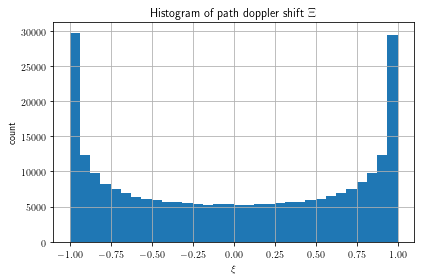

In [37]:
NN_bin = 32                # Number of bins
NN_pth = NN_bin * 8192     # Number of doppler shifts
jakes_fading(NN_sym=0, NN_pth=NN_pth)

fig, axs = plt.subplots()
axs.set_title(r"Histogram of path doppler shift $\Xi$")
axs.set_xlabel(r"$\xi$")
axs.set_ylabel(r"count")
axs.hist(xi_l,bins = NN_bin)

fig.tight_layout()
fig.savefig("./plots/doppler_shifts.pdf")

# Fading Envelope

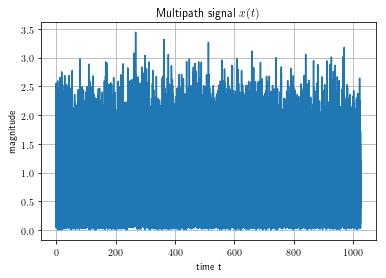

In [38]:
NN_sym = 1024 # number of symbols
NN_sps =  256 # number of samples per symbol
NN_pth =  256 # number of paths
FF_dop =   16 # maximum doppler shift (Hz)
FF_car =   50 # carrier frequency (Hz)
FF_sym =    1 # symbol rate (baud)

jakes_fading(NN_sym,NN_sps,NN_pth,FF_dop,FF_car,FF_sym)

fig, axs = plt.subplots()
axs.set_title(r"Multipath signal $x(t)$")
axs.set_xlabel(r"time t")
axs.set_ylabel(r"magnitude")
axs.plot(tt_n,np.abs(xx_n))

# Doppler Power Spectrum

Still working on scaling and centering spectrum properly.

Welch periodogram properties:
frequency spacing:     0.0078125 Hz
Number of frequencies: 131072
nperseg:               131072.0


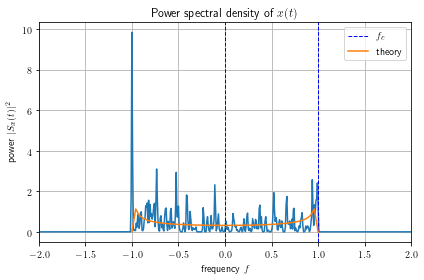

In [112]:
NN_sym =     256 # number of symbols
NN_sps =  1024 # number of samples per symbol
NN_pth =  256 # number of paths
FF_dop =   1 # maximum doppler shift (Hz)
FF_car =    0 # carrier frequency (Hz)
FF_sym =    1 # symbol rate (baud)

jakes_fading(NN_sym, NN_sps, NN_pth, FF_dop, FF_car, FF_sym)

# Welch Spectrum
nperseg = NN_sam/2 # frequency range [-NN_sps/2,NN_sps/2]
ff, Sx = signal.welch(xx_n,
                      fs = FF_sam,
                      return_onesided = False,
                      nperseg = nperseg)

k = np.arange(ff.size) # frequency index
ff_k = ff[np.argsort(ff)]
Sx_k = Sx[np.argsort(ff)]


# Plotting Code
fig, axs = plt.subplots()
axs.set_title(r"Power spectral density of $x(t)$")
axs.set_xlabel(r"frequency $f$")
axs.set_ylabel(r"power $|S_x(t)|^2$")
axs.plot(ff_k,Sx_k)
axs.axvline(FF_car + FF_dop,linestyle = "--",linewidth=1,color="blue")
axs.axvline(FF_car,label="$f_{c}$",linestyle = "--",linewidth=1,color="blue")

# Theoretical Doppler Spectrum
def Sx_theory(f,f_dop = 1):
    func = lambda x: 1/(np.pi*f_dop*np.sqrt(1-(x/f_dop)**2))
    return np.piecewise(f,[np.abs(f)<f_dop],[func,0])

f = np.linspace(-(FF_car+FF_dop)/FF_sym,(FF_car+FF_dop)/FF_sym)
axs.plot(f,FF_sym*Sx_theory((f-FF_car)*FF_sym,f_dop=FF_dop),label="theory")

axs.set_xlim(-2*(FF_car+FF_dop)/FF_sym,2*(FF_car+FF_dop)/FF_sym)

axs.legend()
fig.tight_layout()
fig.savefig("./plots/doppler_spectrum.pdf")

print("Welch periodogram properties:")
print("frequency spacing:     {} Hz".format(ff_k[1] - ff_k[0]))
print("Number of frequencies: {}".format(ff_k.size))
print("nperseg:               {}".format(nperseg))